In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import subprocess

In [96]:
config = {'entries' : [], 'files to read': []}
pair_h = []

for i in np.linspace(0.01, 0.01, 1):
    pair_h.append([i, 10000])

for i in range(len(pair_h)):
    config['entries'].append({
        'model' : 'Heun',
        'omega' : 39.8571e13,
        'initial coordinate' : 6.4e6,
        'initial velocity' : 5e3,
        'modeling interspace' : pair_h[i][1],
        'step of modeling' : pair_h[i][0],
        'file name' : 'data/Heun_'+
        str(int(39.8571e13))+'_'+
        str(int(6.4e6))+'_'+
        str(int(5e3))+'_'+
        str(int(pair_h[i][1]))+'_'+
        str(round(pair_h[i][0],6))+'.txt'
    })
    config['files to read'].append({'name':
        'data/Heun_'+
        str(int(39.8571e13))+'_'+
        str(int(6.4e6))+'_'+
        str(int(5e3))+'_'+
        str(int(pair_h[i][1]))+'_'+
        str(round(pair_h[i][0],6))+'.txt',
        'model' : 'Heun'
    })
write = open('config_file.json', 'w')
json.dump(config, write, indent=4)
write.close()

In [97]:
output = subprocess.check_output('model.exe')
print(output.decode('utf-8'))

Entries number: 1

type: Solver
parameters:
model		Heun
init. coord	6.400000e+06
init. velocity	5.000000e+03
omega		3.985710e+14
mod. interspace	1.000000e+04
step of count	1.000000e-02

10% solved
20% solved
30% solved
40% solved
50% solved
60% solved
70% solved
80% solved
90% solved
100% solved

status: solved successfully

collecting files
10% written
20% written
30% written
40% written
50% written
60% written
70% written
80% written
90% written
100% written

data has been written to data/Heun_398571000000000_6400000_5000_10000_0.01.txt

end of modeling


In [98]:
d_h = []
count = 0
for i in range(len(config['files to read'])):
    if (config['files to read'][i]['model'] == 'Heun'):
        d_h.append(pd.read_csv(config['files to read'][i]['name']))
    count += 1
print(count, 'files were added')
print('Houn:  ',len(d_h))

1 files were added
Houn:   1


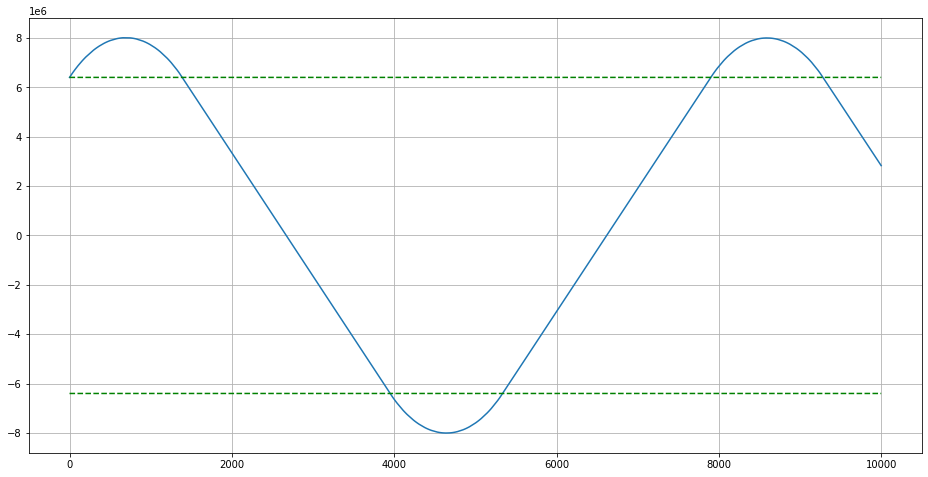

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)

t = np.linspace(0, d_h[0].L[0], len(d_h[0].x))
ax.plot(t, d_h[0].x)
ax.plot(t, 6.4e6+t-t, '--', c='green')
ax.plot(t, -6.4e6+t-t, '--', c='green')

ax.grid(True)

plt.show()